<h1 align="center">Uni-variable Data exploration</h1>
<h3 align="center">This Notebook contains analysis and visualizations for single features of the New York City Airbnb Price Dataset</h3> 
<h4 align="center"> Author: Amandine Allmang</h4> 

In [1]:
import numpy as np
import pandas as pd
import sklearn 

#imports for plots
import seaborn as sns
import matplotlib.pyplot as plt

## **1. Setup**

In [2]:
df = pd.read_csv('/Users/amandineallmang/Desktop/MSc-AI/Ensemble_Learning/project_data/AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
#general information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [3]:
#counting all null/NaN values per column
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [4]:
#filling NaN values in reviews_per_month column by 0
df.fillna({'reviews_per_month':0}, inplace=True)

In [5]:
#checking if there are duplicate instances
df.duplicated().any() #no duplicates to be dropped in this dataset

False

## **2. Helper functions for the data visualzation plots**

In [131]:
def bar_plot(x, y, df, title="", ylabel = "", xlabel= "", rotation = 180):
    '''
    This helper function allows to make a bar plot for given x and y columns of a dataframe
    '''
    sns.barplot(x=x, y=y, data=df,
                    palette='Blues_d')
    plt.title(title,weight='bold')
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.xticks(rotation=rotation)

In [141]:
def pie_plot(data, plot_title ="", pie_title = ""):
    '''
    This helper function allows to make a pie chart for a given y column of a dataframe
    '''
    data.plot.pie(title=pie_title, figsize=(8,8), autopct='%1.1f%%')
    plt.ylabel(None)
    plt.title(plot_title,weight='bold')

In [147]:
def cat_plot(y, title="",  ylabel = ""):
    '''
    This helper function allows to make a count plot for a given y columns of a dataframe
    '''
    sns.catplot(y=y, kind="count",
                palette="Blues_d", edgecolor=".6",
                data=df)
    plt.title(title,weight='bold')
    plt.xlabel("Counts")
    plt.ylabel(ylabel)

## **3. Data analysis and visualisaztions of specific features**

### *a. Neighborhood groups*

In [6]:
#number of unique neighborhood groups
print("Number of unique ngihborhood groups:", df.neighbourhood_group.nunique())

Number of unique ngihborhood groups: 5


In [7]:
#nb of listings per group 
print("Number of listings per neighborhood group:")
df.neighbourhood_group.value_counts()

Number of listings per neighborhood group:


Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

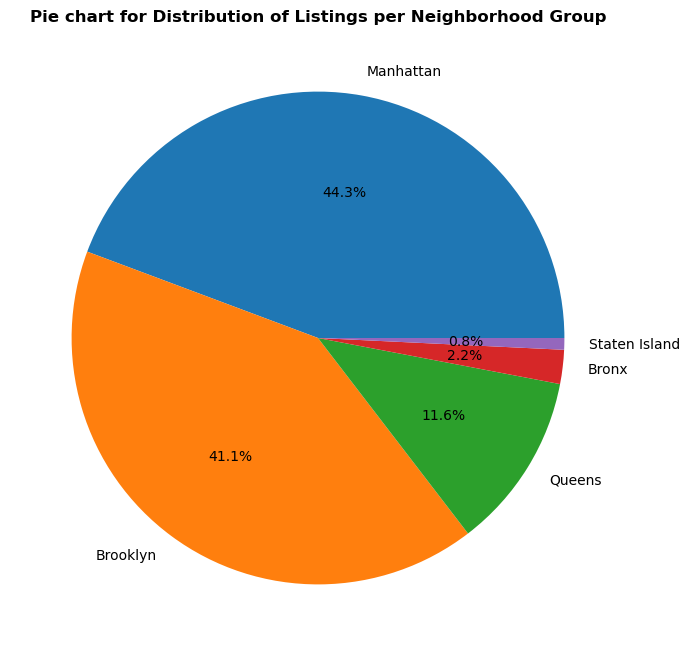

In [142]:
pie_plot(df.neighbourhood_group.value_counts(), plot_title ="Pie chart for Distribution of Listings per Neighborhood Group", pie_title = "Neighborhood Groups")

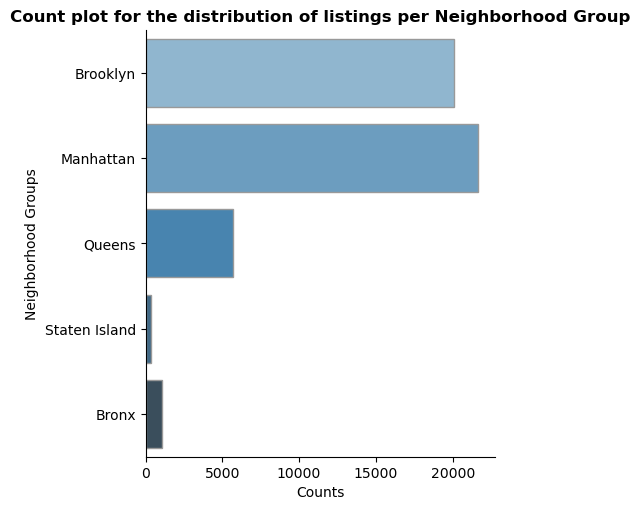

In [148]:
cat_plot(y="neighbourhood_group", title="Count plot for the distribution of listings per Neighborhood Group", ylabel = "Neighborhood Groups")

### *b. Neighborhoods*

*Observation*: There are 221 unique neighborhoods in the dataset. The top 10 neighborhoods with the most listings represent 47.95%, while neighborhoods with less than 1,000 listings represent only 0.43% of the listings.

In [13]:
#nb of unique neighborhoods
print("Number of unique neighborhoods:", df.neighbourhood.nunique())

Number of unique neighborhoods: 221


In [14]:
#nb of listings per neighborhood
print("Number of listings per neighborhood:")
df.neighbourhood.value_counts()

Number of listings per neighborhood:


Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 221, dtype: int64

In [88]:
#top 10 neighborhoods
print("Top 10 neighborhoods with the most listings:")
#getting listing count per neighborhood
neighbourhood_count = df.neighbourhood.value_counts()
#converting to dataframe
neighbourhood_df = pd.DataFrame(neighbourhood_count)
#resetting index
neighbourhood_df.reset_index(inplace=True)
#renaming columns
neighbourhood_df.rename(columns={'index': "Neighborhood", 'neighbourhood':'count'}, inplace=True)

#top 10 neighborhoods with most listings
nb_top10 = neighbourhood_df.head(10)
nb_top10

Top 10 neighborhoods with the most listings:


,Neighborhood,count
0,Williamsburg,3920
1,Bedford-Stuyvesant,3714
2,Harlem,2658
3,Bushwick,2465
4,Upper West Side,1971
5,Hell's Kitchen,1958
6,East Village,1853
7,Upper East Side,1798
8,Crown Heights,1564
9,Midtown,1545


In [89]:
#total number of listings
total_list = neighbourhood_df['count'].sum()
#total number of listingsin top 10 
total_list_top10 = nb_top10['count'].sum()
#percentage that top 10 represent
perc = total_list_top10/total_list * 100

print(f"The top 10 neighborhoods represent {perc:.2f}% of the total counts.")

The top 10 neighborhoods represent 47.95% of the total counts.


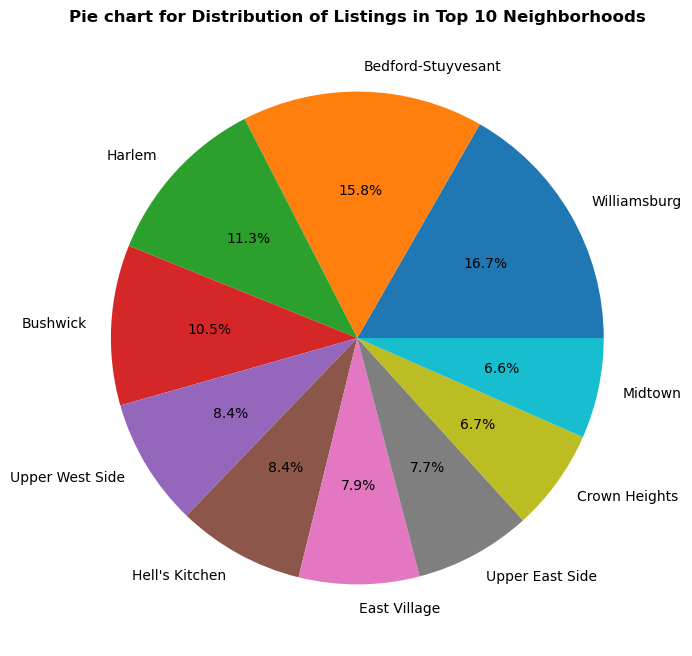

In [143]:
pie_plot(df.neighbourhood.value_counts().head(10), plot_title ="Pie chart for Distribution of Listings in Top 10 Neighborhoods", pie_title = "Neighborhoods")

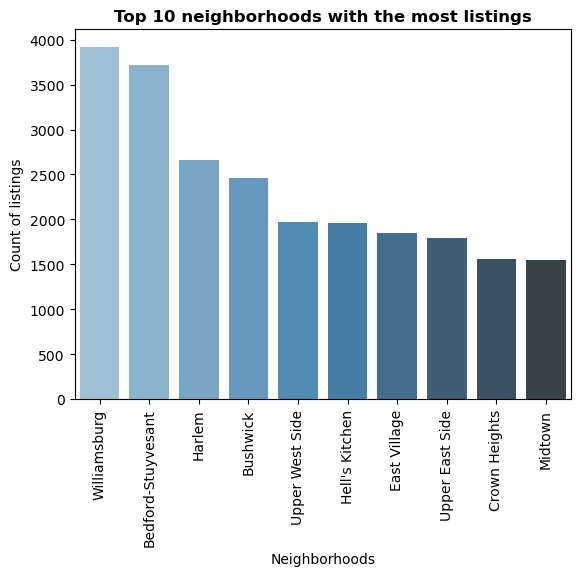

In [133]:
bar_plot(x="Neighborhood", y="count", df=nb_top10, title="Top 10 neighborhoods with the most listings", ylabel = "Count of listings", xlabel= "Neighborhoods", rotation = 90)

In [69]:
#getting the neighborhoods with less than 10 listings
smallest_nb_10 = neighbourhood_df.loc[neighbourhood_df['count']<=10]

#getting the neighborhoods with less than 100 listings
smallest_nb_100 = neighbourhood_df.loc[neighbourhood_df['count']<=100]

#getting the neighborhoods with less than 1000 listings
smallest_nb_1000 = neighbourhood_df.loc[neighbourhood_df['count']<=1000]

print("Number of neighborhoods with less than 10 listings:", len(smallest_nb_10))
print("Number of neighborhoods with less than 100 listings:", len(smallest_nb_100))
print("Number of neighborhoods with less than 1000 listings:", len(smallest_nb_1000))


Number of neighborhoods with less than 10 listings: 59
Number of neighborhoods with less than 100 listings: 156
Number of neighborhoods with less than 1000 listings: 208


In [61]:
perc_small = len(smallest_nb_1000) / total_list * 100
print(f"The neighborhoods with less than 1000 listings represent {perc_small:.2f}% of the total counts.")

The neighborhoods with less than 1000 listings represent 0.43% of the total counts.


### *c. Room types*

*Observation*: There are 3 types of rooms in the dataset. "Entire room/apt" represent the majority class with 52% of the listings.

In [38]:
#nb of unique room types
print('Unique room type:')
for room in range(3):
    print(df.room_type.unique()[room])

Unique room type:
Private room
Entire home/apt
Shared room


In [39]:
#nb of listings per room type
print("Number of listings per room type:")
df.room_type.value_counts()

Number of listings per room type:


Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

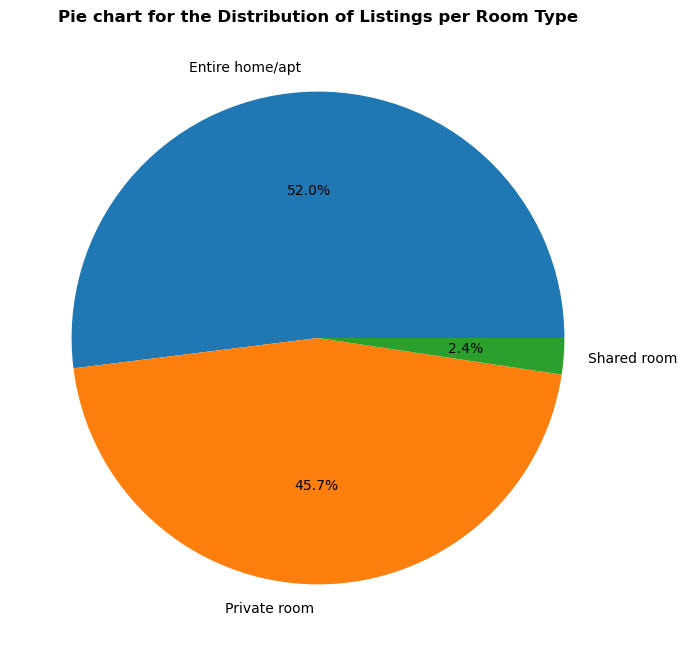

In [144]:
pie_plot(df.room_type.value_counts(), plot_title ="Pie chart for the Distribution of Listings per Room Type", pie_title = "Room types")

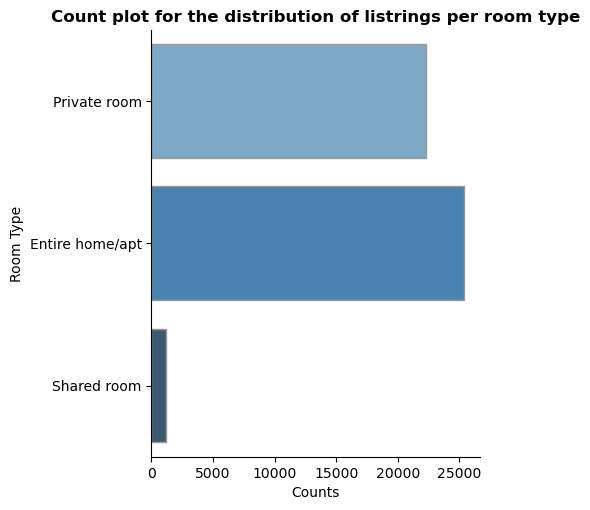

In [149]:
cat_plot(y="room_type", title="Count plot for the distribution of listrings per room type", ylabel = "Room Type")

### *d. Number of reviews*

*Observations*: The most frequent number of reviews is 0, with over 10,000 listings. Over 60% of the listings have under 10 reviews.

In [33]:
#key metrics for the nb of reviews
df.number_of_reviews.describe()

count    48895.000000
mean        23.274466
std         44.550582
min          0.000000
25%          1.000000
50%          5.000000
75%         24.000000
max        629.000000
Name: number_of_reviews, dtype: float64

In [81]:
#most frequent number of reviews : top 10
top10_nb_reviews = df.number_of_reviews.value_counts().head(10)
#converting to dataframe
top10_nb_reviews_df = pd.DataFrame(top10_nb_reviews)
#resetting index
top10_nb_reviews_df.reset_index(inplace=True)
#renaming columns
top10_nb_reviews_df.rename(columns={'index': "Nb_reviews", 'number_of_reviews':'count'}, inplace=True)
top10_nb_reviews_df


,Nb_reviews,count
0,0,10052
1,1,5244
2,2,3465
3,3,2520
4,4,1994
5,5,1618
6,6,1357
7,7,1179
8,8,1127
9,9,964


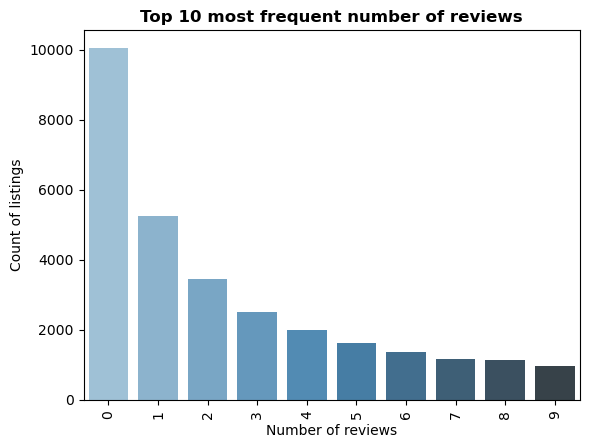

In [134]:
bar_plot(x="Nb_reviews", y="count", df=top10_nb_reviews_df, title="Top 10 most frequent number of reviews", ylabel = "Count of listings", xlabel= "Number of reviews", rotation = 90)

/Users/amandineallmang/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Number of Reviews Distribution Plot')

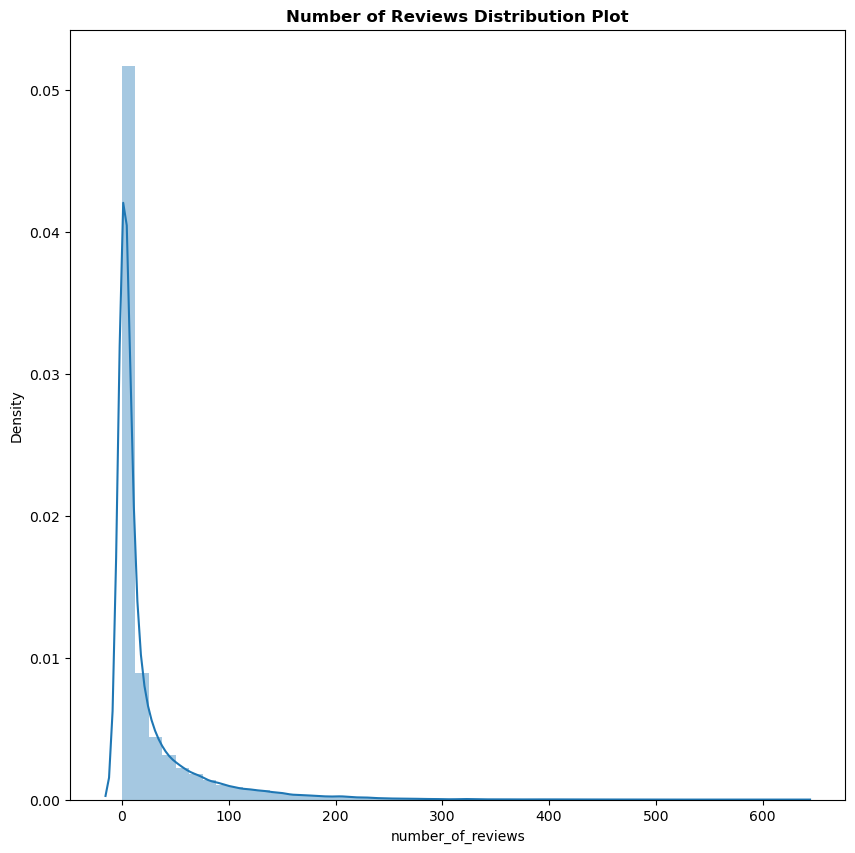

In [84]:
#distib for price
plt.figure(figsize=(10,10))
sns.distplot(df['number_of_reviews'])
plt.title("Number of Reviews Distribution Plot", weight='bold')

In [99]:
#total count of listings for top 10 nb of reviews
top10_reviews_sum = top10_nb_reviews_df['count'].sum()
#percentage
perc_reviews = top10_reviews_sum/len(df) * 100

print(f" {perc_reviews:.2f}% of the listings have under 10 reviews")


 60.37% of the listings have under 10 reviews


### *e. Price*

*Observations*: The average price per night is 152.72 dollars. The listings prices range from 152.72 to 10,000 dollars.

In [37]:
df.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [100]:
price_avg = df.price.mean()
print('Average price per night: {}'.format(price_avg))

Average price per night: 152.7206871868289


/Users/amandineallmang/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Price Distribution Plot')

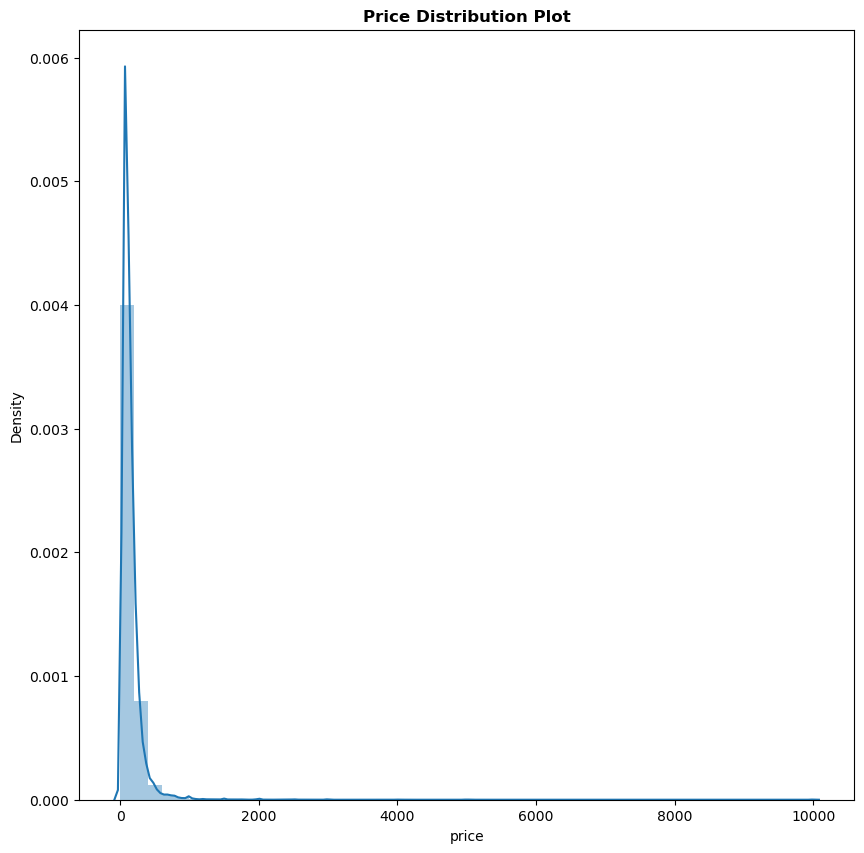

In [104]:
#distib for price
plt.figure(figsize=(10,10))
sns.distplot(df['price']) #, fit=norm)
plt.title("Price Distribution Plot",weight='bold')

/Users/amandineallmang/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Log-Price Distribution Plot')

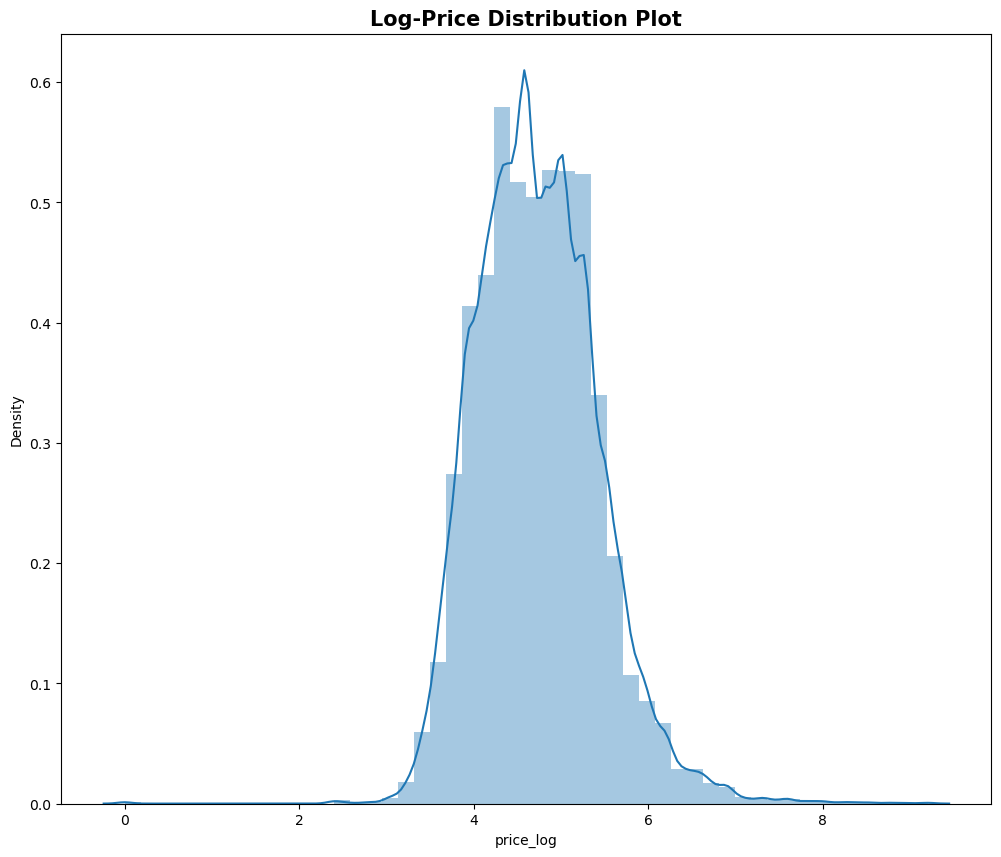

In [102]:
#log distrib for price
df['price_log'] = np.log(df.price+1)
plt.figure(figsize=(12,10))
sns.distplot(df['price_log'])
plt.title("Log-Price Distribution Plot", weight='bold')

### *f. Number of nights*

*Observations*: The top 10 most frequent number of minimum nights represent over 94% of the listings. The most frequent minimal number of nights is 1.

In [39]:
df.minimum_nights.describe()

count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [106]:
#getting counts for each value of min nb of nights
min_nights_count = df.minimum_nights.value_counts()
#converting to dataframe
min_nights_count_df = pd.DataFrame(min_nights_count)
#resetting index
min_nights_count_df.reset_index(inplace=True)
#renaming columns
min_nights_count_df.rename(columns={'index': "Minimun_nb_nights", 'minimum_nights':'count'}, inplace=True)

#top 10 most frequent min nb of nights
top10_min_nights = min_nights_count_df.head(10)
top10_min_nights


,Minimun_nb_nights,count
0,1,12720
1,2,11696
2,3,7999
3,30,3760
4,4,3303
5,5,3034
6,7,2058
7,6,752
8,14,562
9,10,483


In [107]:
#getting the percentage representation of the top 10 min nb of nights
total_count_top10_nights = top10_min_nights['count'].sum()
perc_nights = total_count_top10_nights / len(df)*100

print(f" The top 10 most frequent number of minimum nights represent {perc_nights:.2f}% of the listings.")


 The top 10 most frequent number of minimum nights represent 94.83% of the listings.


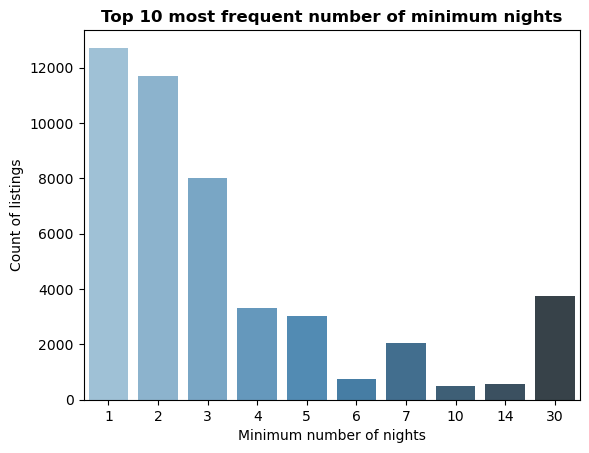

In [137]:
bar_plot(x="Minimun_nb_nights", y="count", df=top10_min_nights, title="Top 10 most frequent number of minimum nights", ylabel = "Count of listings", xlabel= "Minimum number of nights", rotation = 0)

/Users/amandineallmang/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Minimum Number of Nights Distribution Plot')

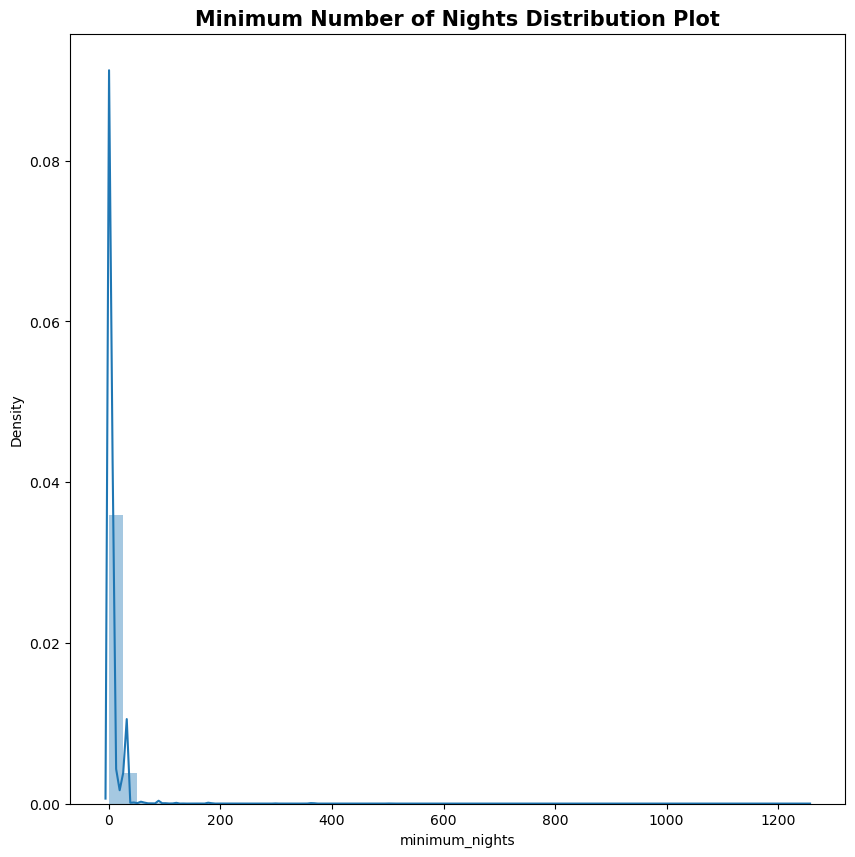

In [105]:
#distib for min nb of nights
plt.figure(figsize=(10,10))
sns.distplot(df['minimum_nights'])
plt.title("Minimum Number of Nights Distribution Plot",weight='bold')

### *g. Longitude and Latitude*

In [41]:
df.longitude.describe()

count    48895.000000
mean       -73.952170
std          0.046157
min        -74.244420
25%        -73.983070
50%        -73.955680
75%        -73.936275
max        -73.712990
Name: longitude, dtype: float64

In [42]:
df.latitude.describe()

count    48895.000000
mean        40.728949
std          0.054530
min         40.499790
25%         40.690100
50%         40.723070
75%         40.763115
max         40.913060
Name: latitude, dtype: float64

In [110]:
#function to plot histogram
def plot_hist(col, bins=10, title="",xlabel="",ax=None):
    sns.histplot(col, bins=bins,ax=ax)
    ax.set_title(f'Histogram of {title}',fontsize=20)
    ax.set_xlabel(xlabel)

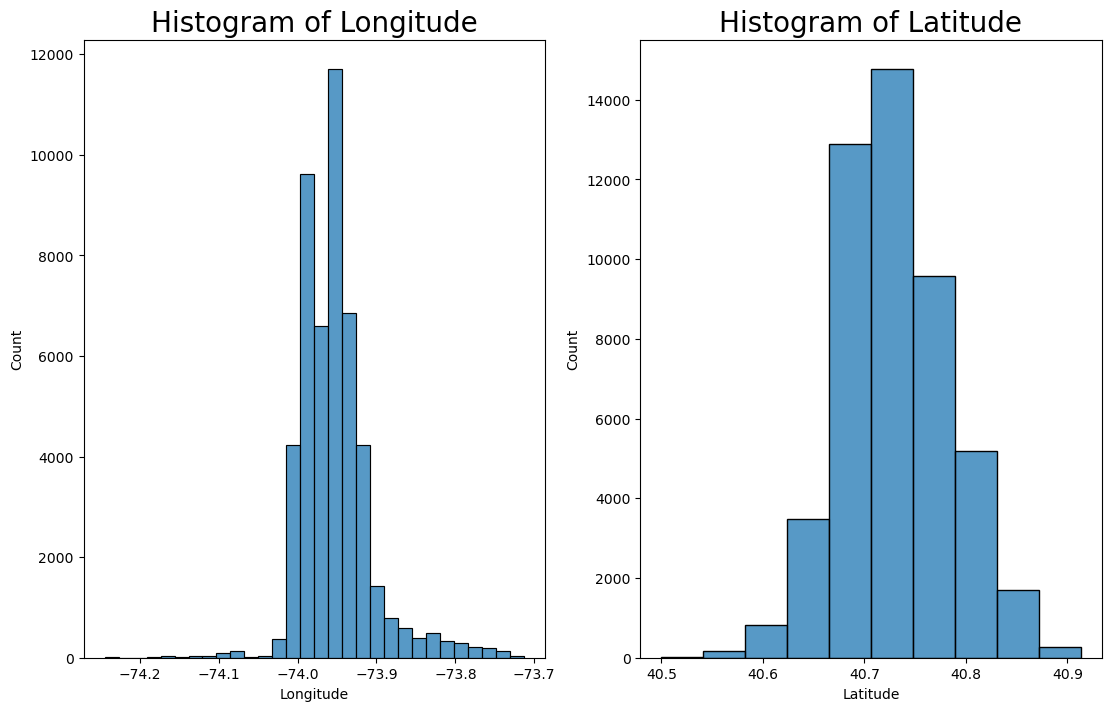

In [44]:
#histograms
fig, axes = plt.subplots(1,2,figsize=(11,7),constrained_layout=True)
#histogram for the longitude
plot_hist(df.longitude,
          title='Longitude',
          xlabel="Longitude",
          ax=axes[0])
#histogram for the latitude
plot_hist(df.latitude,
          bins=10,
          title='Latitude',
          xlabel='Latitude',
          ax=axes[1])

/Users/amandineallmang/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/amandineallmang/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Latitude and Longitude Distribution plot')

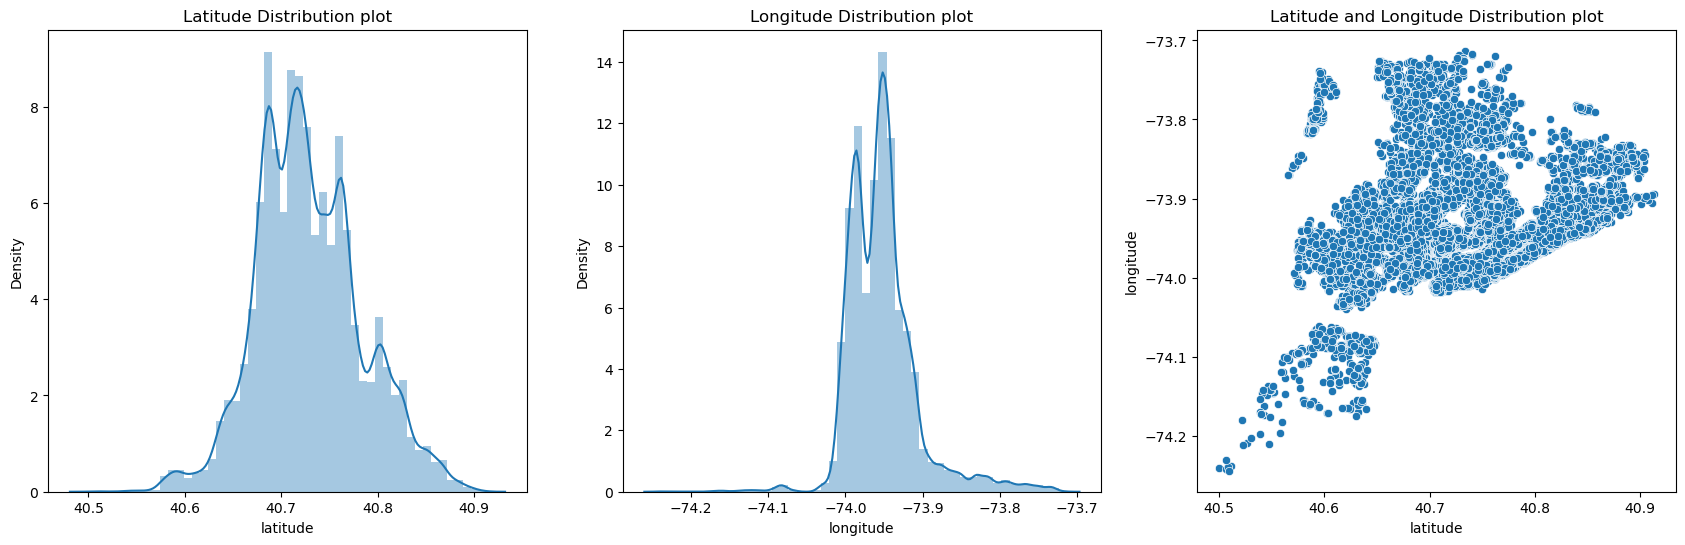

In [111]:
fig, axes = plt.subplots(1,3, figsize=(21,6))
#distribution plot for the latitude
sns.distplot(df['latitude'], ax=axes[0])
axes[0].set_title('Latitude Distribution plot')
#distribution plot for the longitude
sns.distplot(df['longitude'], ax=axes[1])
axes[1].set_title('Longitude Distribution plot')
#scatter plot for longitude and latitude
sns.scatterplot(x= df['latitude'], y=df['longitude'])
axes[2].set_title('Latitude and Longitude Distribution plot')


### *h. Host id*

*Observations*: The top 10 most frequent Host IDs represent only 2.60% of the listings. 

In [112]:
#top 10 hosts with the most listings
top_host = df.host_id.value_counts().head(10)
top_host

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

In [113]:
#datafrom from above list
top_host_df = pd.DataFrame(top_host)
top_host_df.reset_index(inplace=True)
top_host_df.rename(columns={'index':'Host_ID', 'host_id':'Count'}, inplace=True)

top_host_df

,Host_ID,Count
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,16098958,96
5,12243051,96
6,61391963,91
7,22541573,87
8,200380610,65
9,7503643,52


In [115]:
#percentage of listings represented by top 10 host ids
total_count_host_top10 = top_host_df['Count'].sum()
perc_host = total_count_host_top10  / len(df) * 100

print(f" The top 10 most frequent Host ids represent {perc_host:.2f}% of the listings.")

 The top 10 most frequent Host ids represent 2.60% of the listings.


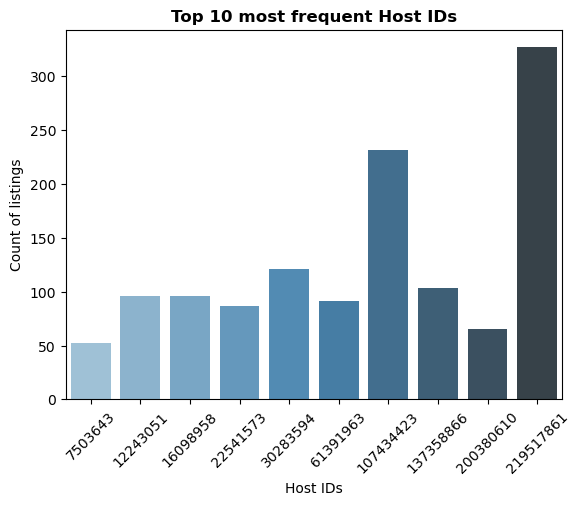

In [138]:
bar_plot(x="Host_ID", y="Count", df=top_host_df, title="Top 10 most frequent Host IDs", ylabel = "Count of listings", xlabel= "Host IDs", rotation = 45)

### *i. Availability*

*Observations*: Almost all listings are not available 365 days a year. The most present category amonst listings is an availability of 0.

In [121]:
#getting counts for each value availability days
availability_count = df.availability_365.value_counts()
#converting to dataframe
availability_count_df = pd.DataFrame(availability_count)
#resetting index
availability_count_df.reset_index(inplace=True)
#renaming columns
availability_count_df.rename(columns={'index': "Availability", 'availability_365':'count'}, inplace=True)

#top 10 most frequent min nb of nights
top10_availability = availability_count_df.head(10)
top10_availability

,Availability,count
0,0,17533
1,365,1295
2,364,491
3,1,408
4,89,361
5,5,340
6,3,306
7,179,301
8,90,290
9,2,270


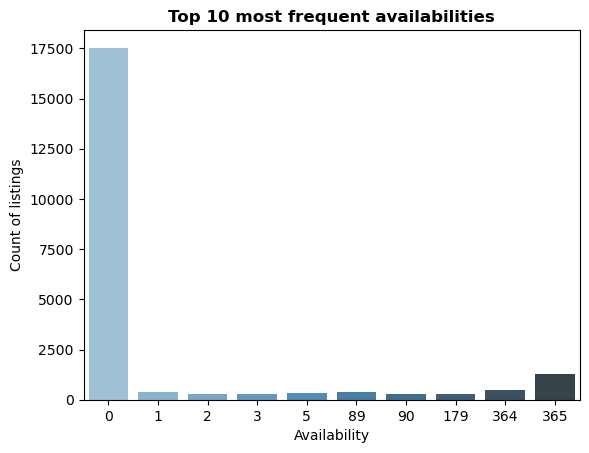

In [140]:
bar_plot(x="Availability", y="count", df=top10_availability, title="Top 10 most frequent availabilities", ylabel = "Count of listings", xlabel= "Availability", rotation = 0)

/Users/amandineallmang/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


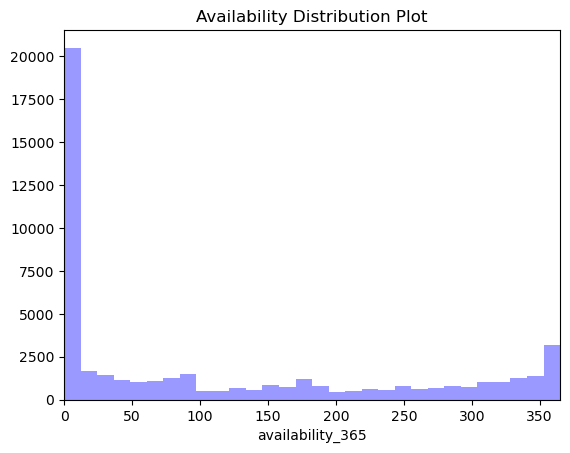

In [119]:
sns.distplot(df['availability_365'], rug=False, kde=False, color="blue")
plt.xlabel('availability_365')
plt.xlim(0, 365)
plt.title("Availability Distribution Plot")
plt.show()

## **4. Correlation map**

*Observations*: No significant correlations appears to be present between the "price" target variable and the other features. However, a correlation is present between the "id" and "host_id", hence at least one of them will be dropped for training. The same observation can be made for the "number_of_reviews" and the "reviews_per_month" columns.

<AxesSubplot:>

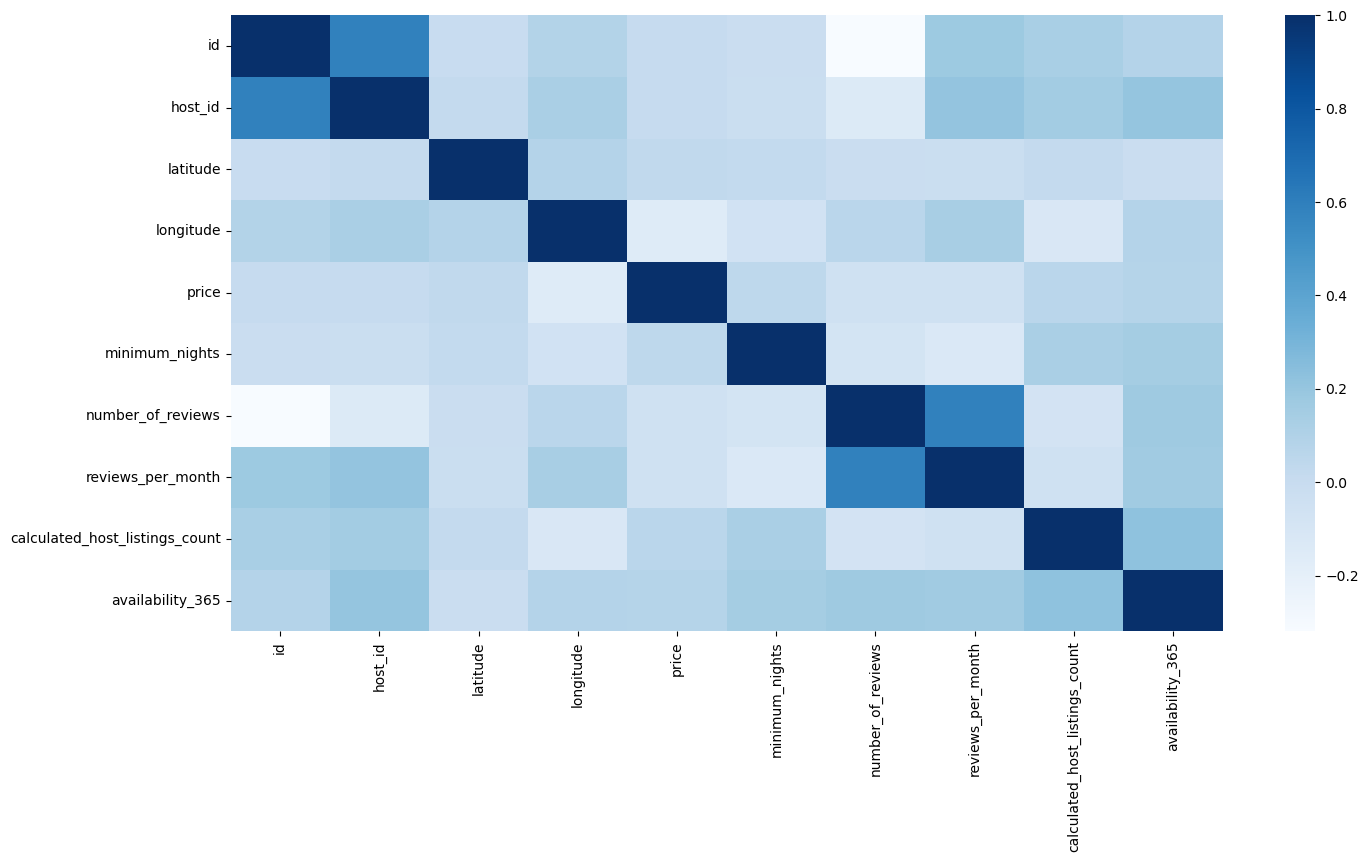

In [130]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),cmap="Blues")